<a href="https://colab.research.google.com/github/itzem-vg/1Parcial-IA/blob/main/Cop1_5_FINAL_1P_Regresi%C3%B3n_one_vs_all.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1er Parcial IA `regresión one vs all`

**Estu:** Itzel Emily Velasquez Guerra
**Carrera:** Ing. Diseño y animacion digital

**Enlace del dataset:**  [MNIST Personalizado MNIST](https://www.kaggle.com/datasets/elskowaski/custom-mnist)

El dataset Ya viene dividido en dos archivos, uno de train y otro de test

Al ser un data set en csv las columnas usadas para la realización de la clasificación:

*   **Entrada:**  784 columnas, que tienen los pixeles de las imágenes a escala de grises con valores que van desde el 0 al 255.
*   **Salida:**
Etiqueta que va del 0 al 9,



# Clasificación Multiclase (One vs All)

## Introducción

En este ejercicio se implementa la regresion one-vs-all y una red neuronal para reconocimiento de digitos.


In [1]:
# utilizado para la manipulación de directorios y rutas
import os

# Cálculo científico y vectorial para python
import numpy as np

# Manejo de datos
import pandas as pd

# Libreria para graficos
from matplotlib import pyplot

# Modulo de optimizacion en scipy
from scipy import optimize

# modulo para cargar archivos en formato MATLAB
from scipy.io import loadmat

# Librería para realizar gráficos
import matplotlib.pyplot as plt

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline


In [2]:
# Importación de archivos desde la nube de Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 Cargamos los datos de entrenamiento


`input_layer_size  = 784`
En esta linea definimos el tamaño de nuestra imagen, que es el resultado de 28 x 28

------------------------------------------------


`num_labels = 10`
Es la cantidad de etiquetas que contiene nuestro dataset


In [3]:
# Las imágenes con las que trabajamos son de dígitos de 28x28
input_layer_size  = 784

# Tenemos 10 etiquetas lo cual seria: (0-9)
num_labels = 10

#  Cargamos los datos de entrenamiento
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/train2.csv')

# Asignamos valores a X y Y
X = data.iloc[:20000, 1:785].values
y = data.iloc[:20000, 0].values

m = y.size

# Comprobamos los tamaños
print("Tamaño de X: ", X.shape)
print("Tamaño de Y: ",  y.shape)

display(data)

Tamaño de X:  (20000, 784)
Tamaño de Y:  (20000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59996,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59997,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59998,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




```
EtiquetaY = data['label'].unique()
```
 `data['label']:`  Esta parte selecciona la columna llamada label del DataFrame data. Es como aislar esa columna específica para su análisis.

 `.unique():` Este es un método que opera en una Serie de PANDAS. Identifica todos los valores distintos presentes en esa columna, eliminando cualquier duplicado.


In [4]:
EtiquetaY = data['label'].unique() #Obtenemos todos los valores unicos de la columna 'label'

#Mostramos la lista de valores unicos y la cantidad de estos
#print(EtiquetaY)
print(len(EtiquetaY))

10


### PUNTO 1 : *Inserte atributos que contengan, caracteres, texto, valores booleanos relacionados a la temática del dataset elegido.*






## Insertar atributos

`def convertir_a_texto(valor):`
esta funcion que crea una columna de tipo objet, que vuelve en sentido literal lo valores de la columna Y "valores de la etiqueta"




`def es_par(num):`
Queremos ver si los valores de nuestra etiqueta es Par o no, y la respuestra es de tipo boleano



In [5]:
df = pd.DataFrame(data)

# Función UNO - para convertir números en texto
def convertir_a_texto(valor):
    if valor == 1:
        return "uno"
    elif valor == 2:
        return "dos"
    elif valor == 3:
        return "tres"
    elif valor == 4:
        return "cuatro"
    elif valor == 5:
        return "cinco"
    elif valor == 6:
        return "seis"
    elif valor == 7:
        return "siete"
    elif valor == 8:
        return "ocho"
    elif valor == 9:
        return "nueve"
    else:
        return "otro"

# Aplicar la función a la última columna y crear la nueva columna 'Texto'
df['Num_Literal'] = df.iloc[:, 0].apply(convertir_a_texto)

# Funcion DOS
def es_par(num):
    return num % 2 == 0  # Un número es par si es divisible entre 2
df['EsPar?'] = df['label'].apply(es_par)


# Mostrar el DataFrame resultante
#display(df)


### categoricos


`def clasificar_numeroTex(valor):`
Clasificacamos los valores de de la etiqueta Y en tres categorias, donde se divide asi:


*   Menor 4 --> Valores Pequeños
*   Igual 5 --> Valores Medio
*   Mayor 6--> Valores Grande

Esta columna es de tipo objet

------------------------------------------

`def clasificar_numero(valor):`

Esta funcion realiza casi exactamente lo mismo, pero asigna valores numericos directamente



In [6]:
# Función para clasificar los números
def clasificar_numeroTex(valor):
    if valor <= 4:
        return "num_peq"
    elif valor == 5:
        return "val_medio"
    else:
        return "num_grand"

# Aplicar la función clasificar_numero a la primera columna y crear una nueva columna de texto 'Clasificación'
df['Clas_Tamanio'] = df['label'].apply(clasificar_numeroTex)

# Mostrar el DataFrame resultante
#df.head()
#print(X.shape)
#display(df)


# Función para clasificar los números en multivarible
def clasificar_numero(valor):
    if valor <= 4:
        return 0
    elif valor == 5:
        return 1
    else:
        return 2

# Aplicar la función clasificar_numero a la primera columna y crear una nueva columna de texto 'Clasificación'
df['Val_Tamanio'] = df['label'].apply(clasificar_numero)

# Mostrar el DataFrame resultante
#df.head()
#print(X.shape)
display(df)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,Num_Literal,EsPar?,Clas_Tamanio,Val_Tamanio
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,cinco,False,val_medio,1
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,otro,True,num_peq,0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,cuatro,True,num_peq,0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,uno,False,num_peq,0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,nueve,False,num_grand,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,ocho,True,num_grand,2
59996,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,tres,False,num_peq,0
59997,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,cinco,False,val_medio,1
59998,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,seis,True,num_grand,2


### **Creamos una copia del dataset**

In [7]:
df_copy = df.copy() # Create a copy of the DataFrame using the copy() method
#display(df_copy)
df_copy.shape

(60000, 789)

## Clasificacion Binaria



`
df_copy.columns.get_loc("Val_Tamanio")
`

El índice de columnas es esencialmente una lista de todos los nombres de columna en el DataFrame.
.get_loc(...): Este es un método que se puede usar en un índice de pandas (como el índice de columna). Toma una etiqueta de columna (en este caso, "Val_Tamanio") como argumento y devuelve la ubicación entera o la posición de esa columna dentro del índice.

In [8]:
df_copy.columns.get_loc("Val_Tamanio")

788


`iloc`

 es un indexador para DataFrames de Pandas. Te ayuda a seleccionar datos por su ubicación entera.

Por ejemplo, df.iloc[0, 0] selecciona el elemento en la primera fila y primera columna.

In [9]:
X_df = df_copy.iloc[:20000, :784].values
y_df = df_copy.iloc[:20000, 788].values

m = y.size
"""print(X_df.shape)
print(y_df.shape)"""

X_df.shape, y_df.shape


((20000, 784), (20000,))

In [10]:
print(y_df)

[1 0 0 ... 0 0 0]


### Graficar Clasificacion


### 1.
```
plt.plot(X_df[y_df==0, 0], X_df[y_df==0, 1], 's', label="Num Menor")
```


*   `X_df[y_df==0, 0]: ` Selecciona los valores de la primera columna (0) de X_df donde el valor correspondiente en y_df es igual a 0.

* `X_df[y_df==0, 1] ` Esto selecciona los valores de la segunda columna (1) de X_df donde el valor correspondiente en y_df es igual a 0.

*   `s` Esto especifica que el marcador para estos puntos de datos debe ser un cuadrado (s).
*  `label="Num Menor":` Establece la etiqueta para estos puntos de datos en la leyenda como "Num Menor".


### 2
`plt.plot(X_df[y_df==1, 0], X_df[y_df==1, 1], 'x', label="Num Medio")`

Esta línea es similar a la primera, pero selecciona puntos de datos donde y_df es igual a 1, usa una cruz (x) como marcador y establece la etiqueta como "Num Medio".



### 3
`plt.plot(X_df[y_df==2, 0], X_df[y_df==2, 1], 'o', label="Num Mayor")`

Esta línea selecciona puntos de datos donde y_df es igual a 2, usa un círculo (o) como marcador y establece la etiqueta como "Num Mayor".

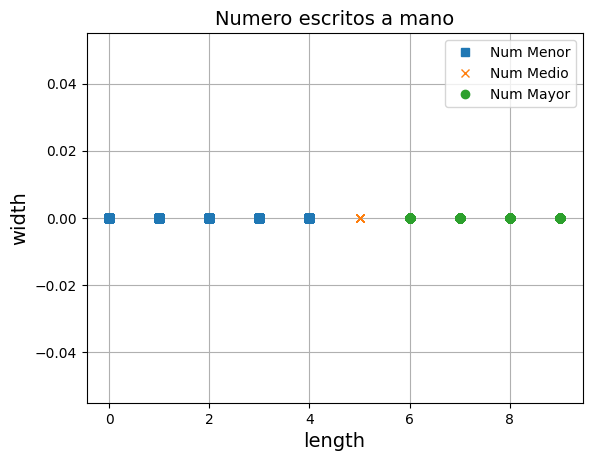

In [11]:
plt.plot(X_df[y_df==0, 0], X_df[y_df==0, 1], 's', label="Num Menor")
plt.plot(X_df[y_df==1, 0], X_df[y_df==1, 1], 'x', label="Num Medio")
plt.plot(X_df[y_df==2, 0], X_df[y_df==2, 1], 'o', label="Num Mayor")
plt.grid()
plt.legend()
plt.xlabel('length', fontsize=14)
plt.ylabel('width', fontsize=14)
plt.title("Numero escritos a mano", fontsize=14)
plt.show()

### 2. Duplique los ejemplos del dataset considerando rangos y criterios que garanticen la consistencia del dataset.

In [12]:
X_df = df.iloc[:20000, 1:].values
y_df = df.iloc[:20000, 0].values

m = y.size
print(X_df.shape)
print(y_df.shape)
#display(data)

(20000, 788)
(20000,)


In [13]:
data.drop(data.index[20000:], inplace=True)

In [14]:
print("Tamaño de X original: ", X.shape)
print("Tamaño de y original: ", y.shape)
print("-" *50)
print("Tamaño de X aumentado: ", X_df.shape)
print("Tamaño de y aumentado: ", y_df.shape)

#display(data)

Tamaño de X original:  (20000, 784)
Tamaño de y original:  (20000,)
--------------------------------------------------
Tamaño de X aumentado:  (20000, 788)
Tamaño de y aumentado:  (20000,)


## Duplicar cantidad de filas


### 1
`def aumentar_filas(data):` La funcion que va a generar el aumento de filas

### 2
 `for i, fila in df_duplicated.iterrows():` que itera a través de las filas de un DataFrame de Pandas llamado df_duplicated.

 `.iterrows():`devuelve una tupla que contiene el índice de la fila y los datos de la fila

`df_duplicated.iterrows():` este método devuelve un iterador que produce pares de (índice, fila) para cada fila en el DataFrame.

`for i, fila in ...:` en cada iteración del bucle, i tomará el valor del índice de la fila actual, y fila será una Serie de Pandas que contiene los valores de esa fila.




In [15]:
# Convertir el diccionario en un DataFrame
#df = pd.DataFrame(data)

# Función para generar nuevas filas
def aumentar_filas(data):

    df_duplicated = data.copy()
    # Crear una lista para almacenar las nuevas filas

    nuevas_filas = []  # Lista para almacenar las nuevas filas

    for i, fila in df_duplicated.iterrows():
        # Obtener el valor de la primera columna (etiqueta Y)
        Y = fila.iloc[0]

        # Modificar el resto de las columnas (suma o resta de 0.2)
        # Creamos la copia de la fila original
        nueva_fila = fila.copy()

        # Modificamos las columnas a partir de la segunda (sin cambiar la primera)
        # .choice es una función del módulo random de NumPy. Generar una muestra aleatoria de elementos de un array o una secuencia.
        nueva_fila.iloc[1:] = fila.iloc[1:] + np.random.choice([-0.01, 0.01], size=len(fila) - 1)

        # Agregar la nueva fila a la lista de nuevas filas, manteniendo la etiqueta Y
        nuevas_filas.append([Y] + list(nueva_fila.iloc[1:]))

    # Convertir la lista de nuevas filas a un DataFrame
    nuevas_filas_df = pd.DataFrame(nuevas_filas, columns=df_duplicated.columns)

    # Concatenar el DataFrame original con el de las nuevas filas
    df_combined = pd.concat([df_duplicated, nuevas_filas_df], ignore_index=True)

    return df_combined

# Aplicar la función para duplicar las filas y generar nuevas
df_aumentado = aumentar_filas(data)

# Mostrar el nuevo DataFrame con las filas aumentadas
#print(df_aumentado)
#display(df_aumentado)
print(df_aumentado.shape)

(40000, 785)


### Verificar si existen datos duplicados

Esa línea de código busca filas duplicadasutilizando el método duplicated().

`df_aumentado.duplicated():`
Este método devuelve una Serie booleana con el mismo índice que df_aumentado. Para cada fila, el valor será True si la fila está duplicada (es decir, si es idéntica a una fila anterior), y False en caso contrario.

`duplicated = ...:` El resultado de df_aumentado. Esta variable ahora contiene una Serie booleana que indica qué filas del DataFrame son duplicadas.

In [16]:
duplicated = df_aumentado.duplicated()
print(duplicated)
print ("-" * 50)

duplicated = df_aumentado.duplicated().any()

if duplicated:
    print("Hay duplicados en el dataset")
else:
    print("No hay duplicados en el dataset")

0        False
1        False
2        False
3        False
4        False
         ...  
39995    False
39996    False
39997    False
39998    False
39999    False
Length: 40000, dtype: bool
--------------------------------------------------
No hay duplicados en el dataset


In [17]:
# Asignamos valores a X y Y
X= df_aumentado.iloc[:, 1:785].values
y= df_aumentado.iloc[:, 0].values

m_df_Au = y.size

# Comprobamos los tamaños
print("Tamaño de X: ", X.shape)
print("Tamaño de Y: ",  y.shape)

display(df_aumentado)


Tamaño de X:  (40000, 784)
Tamaño de Y:  (40000,)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,5.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,4.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,1.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,9.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,9.0,-0.01,-0.01,-0.01,0.01,-0.01,0.01,-0.01,0.01,-0.01,...,0.01,0.01,-0.01,-0.01,-0.01,0.01,-0.01,0.01,-0.01,0.01
39996,5.0,0.01,0.01,-0.01,-0.01,0.01,-0.01,0.01,-0.01,-0.01,...,0.01,0.01,0.01,-0.01,-0.01,-0.01,0.01,0.01,0.01,0.01
39997,1.0,0.01,-0.01,-0.01,0.01,-0.01,0.01,-0.01,0.01,0.01,...,0.01,-0.01,0.01,0.01,0.01,-0.01,0.01,0.01,0.01,0.01
39998,4.0,0.01,-0.01,0.01,-0.01,0.01,-0.01,-0.01,0.01,-0.01,...,-0.01,-0.01,-0.01,-0.01,-0.01,0.01,0.01,0.01,-0.01,-0.01


### PUNTO 4 --Dividir los datos del dataset sintético en datos de entrenamiento y prueba

`len(df_aumentado):` Esta función devuelve el número de filas en el DataFrame df_aumentado.

`0.8 * ...:` Se multiplica el número de filas por 0.8, lo que significa que el 80% de los datos se utilizarán para entrenamiento.



In [18]:
# Calcula el índice que separa los conjuntos de entrenamiento y prueba
split_index = int(0.8 * len(df_aumentado))

# Divide el DataFrame en conjuntos de entrenamiento y prueba
train_df = df_aumentado[:split_index]
test_df = df_aumentado[split_index:]

# Obtén las características (X) y las etiquetas (y) para ambos conjuntos
X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values

print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (32000, 784)
Tamaño de y_train: (32000,)
Tamaño de X_test: (8000, 784)
Tamaño de y_test: (8000,)


### Visualización de los datos

Creamos la función **displayData** , que nos servira para poder representar gráficamente las dimensiones de las imágenes de tamaño 28x28 pixeles.

`int(np.round(np.sqrt(n))):` Esta expresión calcula la raíz cuadrada del número de elementos (n) en cada ejemplo, la redondea al entero más cercano y la convierte a un entero. Esto se utiliza para determinar el ancho de cada imagen asumiendo que son cuadradas.


In [19]:
#ORIGINAL
def displayData(X, example_width=None, figsize=(10, 10)):

    X = np.array(X)  # Convertir a arreglo de numpy

    # Calcula filas, columnas
    if X.ndim == 2:
        m, n = X.shape # es una matriz
    elif X.ndim == 1:
        n = X.size
        m = 1
        X = X[None]  # Promocionar a una matriz bidimensional - Vector
    else:
        raise IndexError('La entrada X debe ser 1 o 2 dimensinal.')

    example_width = example_width or int(np.round(np.sqrt(n)))
    example_height = n / example_width

    # Calcula el numero de elementos a mostrar
    display_rows = int(np.floor(np.sqrt(m))) #.floor s una función de NumPy, que redondea un número al entero inferior más cercano.
    display_cols = int(np.ceil(m / display_rows)) #redondea un número al entero superior más cercano.

    fig, ax_array = pyplot.subplots(display_rows, display_cols, figsize=figsize)
    fig.subplots_adjust(wspace=0.025, hspace=0.025)

    ax_array = [ax_array] if m == 1 else ax_array.ravel()

    for i, ax in enumerate(ax_array):
        # Check if the index is within bounds
        if i < m:
            ax.imshow(X[i].reshape(example_width, example_width, order='C'),
                      cmap='Greys', extent=[0, 1, 0, 1], aspect='equal', origin='upper')
        ax.axis('off') #Oculta los ejes de la subtrama.

# PUNTO 3
Crear una grafica representativa de los datos del dataset inicial y otra con los datos del dataset sintético generado. VISUALIZACION DE DATOS “IMAGENES”

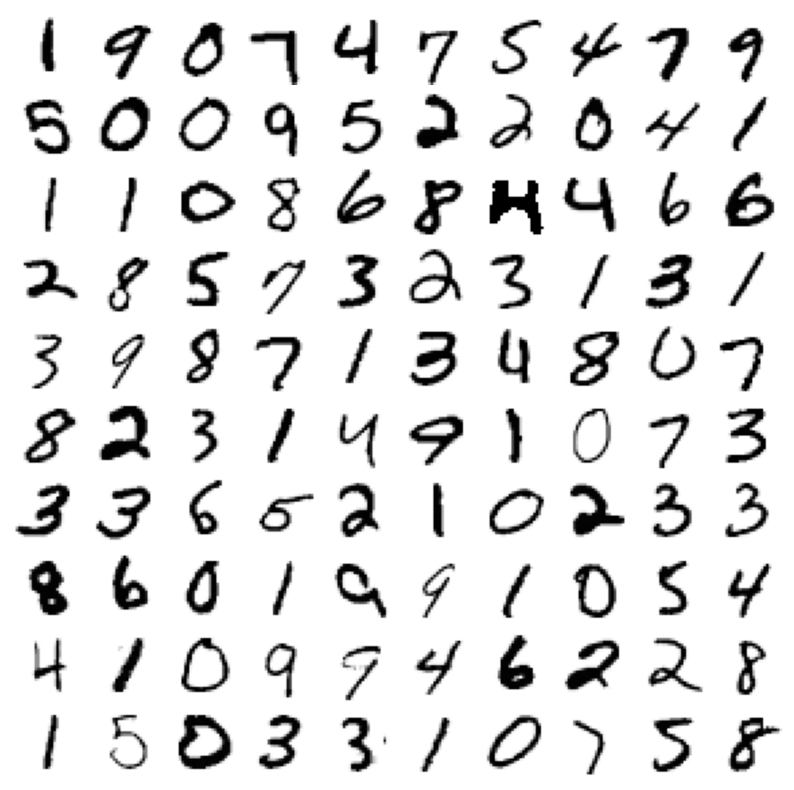

In [20]:
# Selecciona aleatoriamente 100 puntos de datos para mostrar
rand_indices = np.random.choice(m, 100, replace=False)
X_img = X[rand_indices, :]

displayData(X_img)

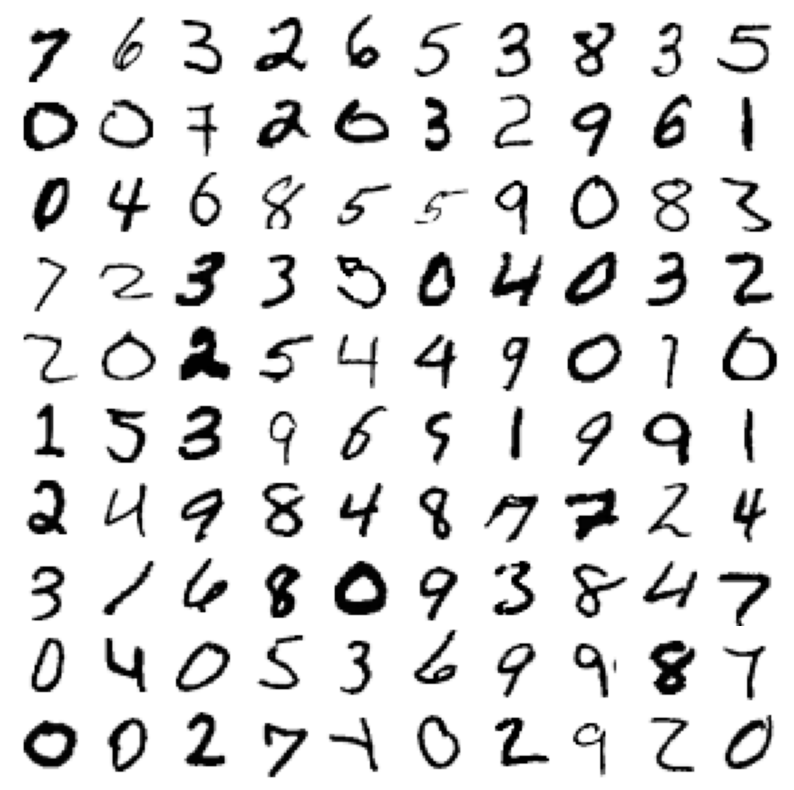

In [21]:
"""#Imprimimos los datos sinteticos
rand_indices = np.random.choice(m, 100, replace=False)
XR_img = X_upsampled[rand_indices, :]

displayData(XR_img)"""
rand_indices = np.random.choice(m, 100, replace=False)
X_img = X_train[rand_indices, :]

displayData(X_img)

Text(0, 0.5, 'Etiqueta')

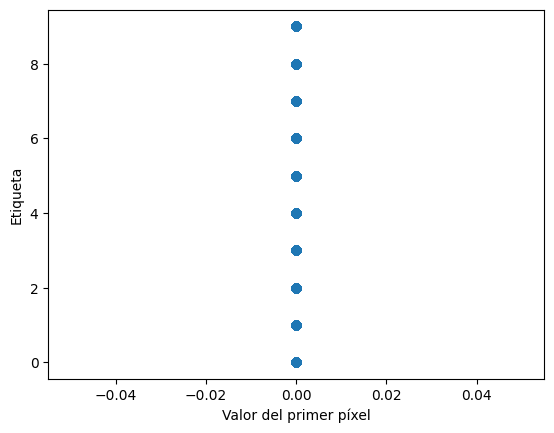

In [23]:
plt.scatter(X_df[:, 0], y_df)
plt.xlabel('Valor del primer píxel')
plt.ylabel('Etiqueta')

### 1.2 Vectorización de regresión logística

En este caso tenemos 25 clasespor eso se utilizará múltiples modelos de regresión logística uno contra todos para construir un clasificador de clases múltiples. Dado que hay 25 clases, deberá entrenar 25 clasificadores de regresión logística separados.



Para probar la regresión logística vectorizada, se usara datos personalizados como se definen a continuación.

`np.ones((5, 1)):` Crea una matriz de 5 filas y 1 columna llena de unos. Esta columna se utilizará para el término de sesgo (intercepto) en la regresión logística.


**Sesgo, Intercepto**-- Permite que la función sigmoide se desplace horizontalmente, lo que influye en el punto de decisión para la clasificación.

`.reshape(5, 3, order='F'):` Cambia la forma del array a una matriz de 5 filas y 3 columnas. El argumento order='F' especifica que el array se rellene en orden de columnas (Fortran-style).


In [24]:
# valores de prueba para los parámetros theta
theta_t = np.array([-2, -1, 1, 2], dtype=float)

# valores de prueba para las entradas
X_t = np.concatenate([np.ones((5, 1)), np.arange(1, 16).reshape(5, 3, order='F')/10.0], axis=1)

# valores de testeo para las etiquetas
y_t = np.array([1, 0, 1, 0, 1])

# valores de testeo para el parametro de regularizacion
lambda_t = 3


#### Vectorización de la funcion de costo
Para esta vectorizacion creamos la función de la sigmoide.

La función sigmoide toma un valor de entrada z (que puede ser un número o un array) y lo transforma en un valor de salida entre 0 y 1. La fórmula matemática es: `1.0 / (1.0 + np.exp(-z))`




In [25]:
# convertir cualquier valor de entrada en un valor de salida entre 0 y 1.
def sigmoid(z):

    #z = np.clip(z, -500, 500)
    return 1.0 / (1.0 + np.exp(-z))

La función de costo utilizada es `lrCostFunction`, que calcula el costo y la gradiente de la regresión logística regularizada.

`J:` El costo de la regresión logística regularizada. Este valor representa qué tan bien se ajusta el modelo a los datos de entrenamiento, teniendo en cuenta la regularización.

`grad:` El gradiente de la función de costo. Este valor indica la dirección en la que se deben ajustar los parámetros del modelo (theta) para minimizar el costo.



In [26]:
#Funcion de costo y gradiente REVISAR VALORES DE X-Y
def lrCostFunction(theta, X, y, lambda_):
    m = y.size #num ejemplos

    if y.dtype == bool:
        y = y.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    #calcula el producto punto entre las características (X) y los parámetros del modelo (theta).
    h = sigmoid(X.dot(theta.T))

    # Evitar valores de h que sean 0 o 1
    epsilon = 1e-10
    h = np.clip(h, epsilon, 1 - epsilon) #Asegura que los valores de h estén dentro del rango

    temp = theta.copy()
    temp[0] = 0

    J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))
    #lambda se refiere al parámetro de regularización.

    grad = (1 / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad


#### 1.2.3 Vectorización regularizada de la regresión logística

Añadimos regularización a la función de costo.
estas líneas evalúan el rendimiento del modelo de regresión logística con los parámetros y datos proporcionados, y muestran el costo resultante.


In [27]:
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('Costo: {:.6f}'.format(J))


Costo: 2.534819


Este código muestra los gradientes calculados para cada parámetro del modelo, lo que es útil para entender cómo se está actualizando el modelo durante el entrenamiento.

Se utiliza para encontrar los parámetros del modelo que minimizan la función de costo.

In [28]:
# Función de descenso por gradiente
def descensoGradiente(theta, X, y, alpha, num_iters, lambda_):
    m = y.shape[0]
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(np.dot(X, theta))  # Asegura que X.dot(theta) sea compatible con np.exp
        #h = np.clip(h, 1e-15, 1 - 1e-15)  # Evitar valores extremos para la función de coste

        gradient = (alpha / m) * np.dot((h - y), X)
        theta = theta - gradient

        J, _ = lrCostFunction(theta, X, y, lambda_)
        J_history.append(J)

    return theta, J_history

In [29]:
print("Tamaño de X_train:", X_train.shape)
print("Tamaño de y_train:", y_train.shape)
print("Tamaño de X_test:", X_test.shape)
print("Tamaño de y_test:", y_test.shape)

Tamaño de X_train: (32000, 784)
Tamaño de y_train: (32000,)
Tamaño de X_test: (8000, 784)
Tamaño de y_test: (8000,)


### PASO 5 "Entrenamiento"-- Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el número de clases que se vinculan al dataset elegido.


En **Pandas**, `.unique()` es un método que se utiliza para encontrar los valores únicos en una Serie o en un DataFrame.



In [30]:
# Parámetros de entrenamiento
alpha = 0.001  # Tasa de aprendizaje
num_iters = 300  # Número de iteraciones
lambda_ = 0.01  # Parámetro de regularización

# Obtener las clases únicas del dataset

#classes = np.unique(y_train)
classes = np.unique(y_train) [:5]
print(classes)

models = {}  # Diccionario para almacenar los modelos entrenados
cost_histories = {}
# Entrenar un modelo de regresión logística para cada clase (One-vs-All)
# Entrenamiento del modelo con la nueva función sigmoide


[0. 1. 2. 3. 4.]


In [ ]:
for contador in classes:
    print(f"Etiqueta: {contador}")
    y_binary = (y_train == contador).astype(int)  # Crear etiquetas binarias
    theta = np.zeros(X_train.shape[1], dtype=np.float64)  # Inicializar theta como array de Numpy con tipo flotante
    theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)
    models[contador] = theta  # Guardar el modelo entrenado
    cost_histories[contador] = cost_history  # Guardar el historial de costos para la clase
    print(f"Coste final para la etiqueta {contador}: {cost_history[-1]}")
    print("-" * 80)

Etiqueta: 0.0
Coste final para la etiqueta 0.0: 0.6931220104087498
--------------------------------------------------------------------------------
Etiqueta: 1.0
Coste final para la etiqueta 1.0: 0.6931169043791324
--------------------------------------------------------------------------------
Etiqueta: 2.0
Coste final para la etiqueta 2.0: 0.6931209096344197
--------------------------------------------------------------------------------
Etiqueta: 3.0
Coste final para la etiqueta 3.0: 0.6931217473724682
--------------------------------------------------------------------------------
Etiqueta: 4.0
Coste final para la etiqueta 4.0: 0.6931193039333536
--------------------------------------------------------------------------------


In [ ]:
classes = np.unique(y_train) [5:]
for contador in classes:
    print(f"Etiqueta: {contador}")
    y_binary = (y_train == contador).astype(int)  # Crear etiquetas binarias
    theta = np.zeros(X_train.shape[1], dtype=np.float64)  # Inicializar theta como array de Numpy con tipo flotante
    theta, cost_history = descensoGradiente(theta, X_train, y_binary, alpha, num_iters, lambda_)
    models[contador] = theta  # Guardar el modelo entrenado
    cost_histories[contador] = cost_history  # Guardar el historial de costos para la clase
    print(f"Coste final para la etiqueta {contador}: {cost_history[-1]}")
    print("-" * 80)

Etiqueta: 5.0
Coste final para la etiqueta 5.0: 0.6931184210976833
--------------------------------------------------------------------------------
Etiqueta: 6.0
Coste final para la etiqueta 6.0: 0.6931206894892215
--------------------------------------------------------------------------------
Etiqueta: 7.0
Coste final para la etiqueta 7.0: 0.6931195840300745
--------------------------------------------------------------------------------
Etiqueta: 8.0
Coste final para la etiqueta 8.0: 0.6931221418076641
--------------------------------------------------------------------------------
Etiqueta: 9.0
Coste final para la etiqueta 9.0: 0.6931205966660415
--------------------------------------------------------------------------------


In [ ]:
"""print('Gradientes calculados:')
for i, val in enumerate(grad, 1):
    print(f'Gradiente {i}: {val:.6f}')"""

Gradientes calculados:
Gradiente 1: 0.146561
Gradiente 2: -0.548558
Gradiente 3: 0.724722
Gradiente 4: 1.398003


### Clasificacion One-vs-all - PASO 5
*Entrenar el modelo utilizando varios modelos de regresión logística por separado, considerando el número de clases que se vinculan al dataset elegido.*

CONCEPTO

Entrenar varios clasificadores de regresión logística regularizados, uno para cada clase en el conjunto de datos.

Además, se utilizará una función para visualizar el costo.

También haremos uso de la función para graficar el costo.







In [ ]:
def oneVsAll(X, y, num_labels, lambda_):
    m, n = X.shape
    all_theta = np.zeros((num_labels, n + 1))
    X = np.concatenate([np.ones((m, 1)), X], axis=1)  # Añadir columna de unos para el término de sesgo

    cost_histories = [[] for _ in range(num_labels)]  # Lista de listas para almacenar el costo por iteración para cada clase

    for c in range(num_labels):
        initial_theta = np.zeros(n + 1)
        options = {'maxiter': 100, 'disp': False}

        # Función callback para almacenar el costo en cada iteración
        def callback(theta):
            cost, _ = lrCostFunction(theta, X, (y == c), lambda_)
            cost_histories[c].append(cost)

        #encontrar los parámetros óptimos (theta) para la regresión logística regularizada.
        res = optimize.minimize(lrCostFunction,
                                initial_theta,
                                args=(X, (y == c), lambda_),
                                jac=True,
                                method='CG',
                                callback=callback,  # Usar el callback aquí
                                options=options)

        all_theta[c] = res.x

        print(f'Theta para la clase {c}: {res.x}')

    return all_theta, cost_histories

In [ ]:
#Imprimimos los valores de theta
for i in range(1, 10): # Itera del 1 al 10
  print(f"Clasificador {i}: {models[i]}")
  print("-" * 120)

Clasificador 1: [ 6.18738348e-06  7.03109603e-06  8.62479963e-06 -6.84356831e-06
 -8.34349496e-06  1.68741457e-06 -4.31248601e-06  9.37493821e-07
  8.71873989e-06 -4.78126561e-06 -2.15625733e-06  2.43745774e-06
  2.05330633e-06  2.12229670e-06 -1.51549058e-06 -1.59439834e-06
  4.31237385e-06  4.96858992e-06 -4.49999456e-06  1.59375578e-06
  6.09361207e-06  2.03407886e-11  2.25001147e-06 -3.09374025e-06
  4.87491007e-06 -4.49998676e-06  2.15621900e-06 -4.68868399e-07
  1.59369286e-06 -8.43736165e-06  5.62488603e-06 -2.99988002e-06
  4.68745629e-07 -7.50048070e-06  8.11613272e-06  9.64869851e-06
  1.26908128e-06 -1.11858029e-05 -2.67039389e-06 -2.13119236e-06
 -1.40083661e-06  9.90443096e-06 -4.44984445e-06  5.31674398e-06
 -8.31090856e-07 -7.49036842e-07 -2.86734315e-06  2.52168874e-06
  2.38086482e-06 -3.07172239e-06  1.20513438e-05 -4.05952697e-06
 -6.37490894e-06  6.09382623e-06  1.59375112e-06  5.62540021e-07
  1.78121282e-06 -6.37482628e-06  1.49990317e-06  3.75030794e-07
  3.74172

In [ ]:
#Agragamos valor a lamnda
lambda_ = 0.0001
#Llamamos a la funcion
all_theta, cost_histories  = oneVsAll(X, y, num_labels, lambda_)


Theta para la clase 0: [-4.23002923e+00  3.41179189e+00  5.98552874e-01  1.02118264e+00
  4.12396168e+00  1.75942697e+00  9.46608331e-01  5.79192510e+00
  5.31512311e+00  3.53695924e+00  3.15291420e+00 -3.93939156e+00
 -1.73525940e-01  8.69712815e-01  4.88246087e+00 -3.30299870e+00
  2.70322329e+00 -2.58983918e+00  9.10863751e+00 -3.40542227e+00
 -2.31000191e+00  1.00460335e-01  8.87161981e+00 -7.46659378e-02
 -1.18407699e+00 -1.40942122e-02 -4.03731455e-01  5.05554897e+00
  5.33831635e+00 -9.38399384e-01  3.14883351e+00  2.43151472e-02
 -2.36008058e+00 -2.23969509e+00 -3.10853079e+00 -2.21273894e+00
  3.46716877e+00 -4.81591524e-01 -1.94514806e+00  2.69339248e+00
 -3.52653029e+00 -5.82839219e+00  7.12156016e-02  2.14279450e+00
 -8.86792424e-01  1.96669399e+00 -6.10063393e+00 -1.38872539e+00
 -1.07877856e+00 -2.14115896e+00  5.31589719e+00 -3.02012271e+00
  6.97630748e-01  3.06875251e+00  3.71592300e+00 -9.17309665e+00
  3.46377757e+00 -3.26473679e+00  1.16725002e+00  1.93727922e+00
 -

#### Gráficar COSTO


In [ ]:
def plot_cost(cost_histories): #Función para graficar la evolución del costo a lo largo de las iteraciones.
    plt.figure(figsize=(12, 8))
    for i in range(num_labels):
        plt.plot(cost_histories[i], label=f'Clase {i}')
    plt.xlabel('Número de iteraciones')
    plt.ylabel('Costo')
    plt.title('Costo durante la optimización para cada clase')
    plt.legend()
    plt.show()

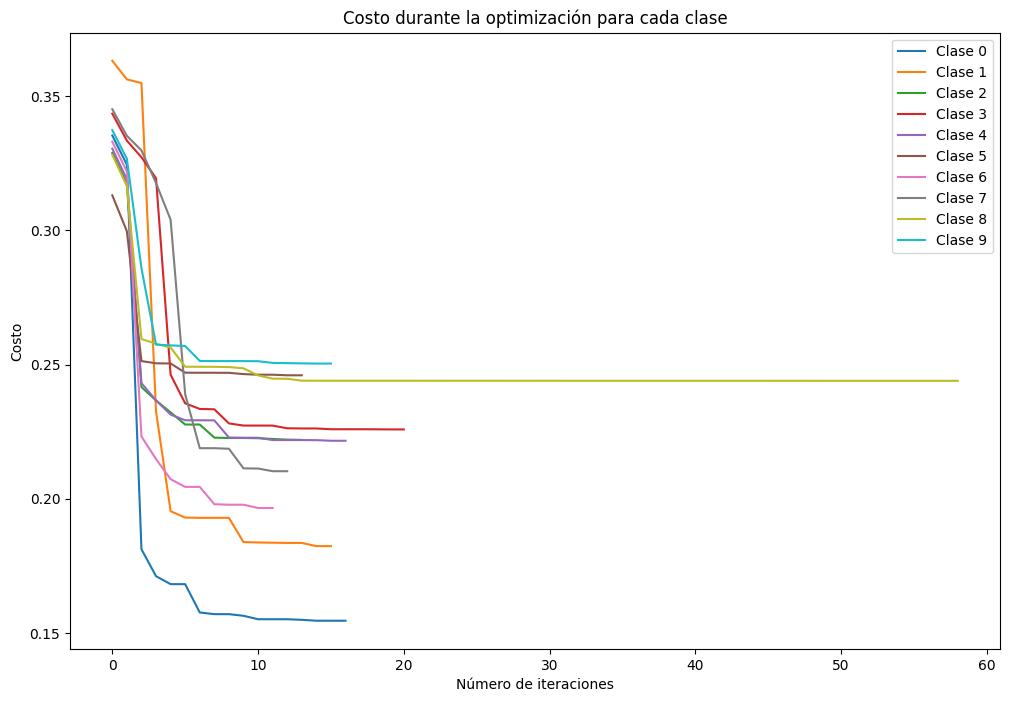

In [ ]:
#Llamamos a la funcion
plot_cost(cost_histories)

### Prediccion One-vs-all


In [ ]:
#Por cada dato de entrada,calcular la probabilidad de que pertenezca a cada clase usando los clasificadores de regresión logística.

def predictOneVsAll(all_theta, X):

    m = X.shape[0];
    num_labels = all_theta.shape[0]

    p = np.zeros(m)

    # Añade una columna de 1
    X = np.concatenate([np.ones((m, 1)), X], axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)), axis = 1)

    return p

# PASO 10
 Se debe utilizar el dataset de prueba para determinar la efectividad de los modelos desarrollados.




In [ ]:
"""#  Cargamos los datos de entrenamiento
data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/datasets/t10k.csv')


X_test = data_test.iloc[:, 1:785].values
y_test = data_test.iloc[:, 0].values"""

m_test = y_test.size
# Comprobamos los tamaños
print(X_test.shape)
print(y_test.shape)

(8000, 784)
(8000,)


#### Precisión y predicción


In [ ]:
#Precisión con el 80% de los datos.
pred_train = predictOneVsAll(all_theta, X)
print('Precision del entrenamiento: {:.2f}%'.format(np.mean(pred_train == y) * 100))

Precision del entrenamiento: 64.62%


In [ ]:
#Precisión con el 20% de los datos.
pred_test = predictOneVsAll(all_theta, X_test)
print('Precision de prueba: {:.2f}%'.format(np.mean(pred_test == y_test) * 100))

Precision de prueba: 45.06%


## Prueba con datos de test

`.choice` es una función que forma parte del módulo random en NumPy (np.random). Se utiliza para generar una muestra aleatoria de elementos de un array o secuencia.




In [ ]:
#Predicción con los datos de prueba.

def select_random_data(X, y, m, num_samples=50):
  #selecciona aleatoriamente un subconjunto de datos de un conjunto de datos más grande.
    rand_indices = np.random.choice(m, num_samples, replace=False)
    return X[rand_indices, :], y[rand_indices]

In [ ]:
def plot_results(X, y, all_theta): #predicción de clases utilizando un modelo de regresión logística
    X_with_ones = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
    #Añade una columna a X para incluir el término de sesgo (intercepto)
    predictions = np.argmax(sigmoid(X_with_ones.dot(all_theta.T)), axis=1) #realiza las predicciones
    print(f'Predicciones: {predictions}')
    print(f'Valores reales: {y}')

    # Graficar los resultados
    displayData(X)

## Original

Predicciones: [3 2 0 1 3 4 7 1 1 1 7 4 9 6 0 8 9 7 6 1 4 9 1 7 9 1 2 1 5 6 7 1 4 4 9 7 2
 4 1 6 8 8 7 8 5 3 0 4 1 6]
Valores reales: [3. 3. 0. 1. 3. 4. 7. 1. 1. 1. 7. 4. 9. 6. 0. 8. 9. 7. 6. 1. 4. 9. 1. 7.
 9. 1. 2. 1. 5. 6. 7. 1. 4. 4. 9. 7. 2. 4. 1. 6. 8. 8. 7. 8. 5. 5. 0. 2.
 7. 0.]


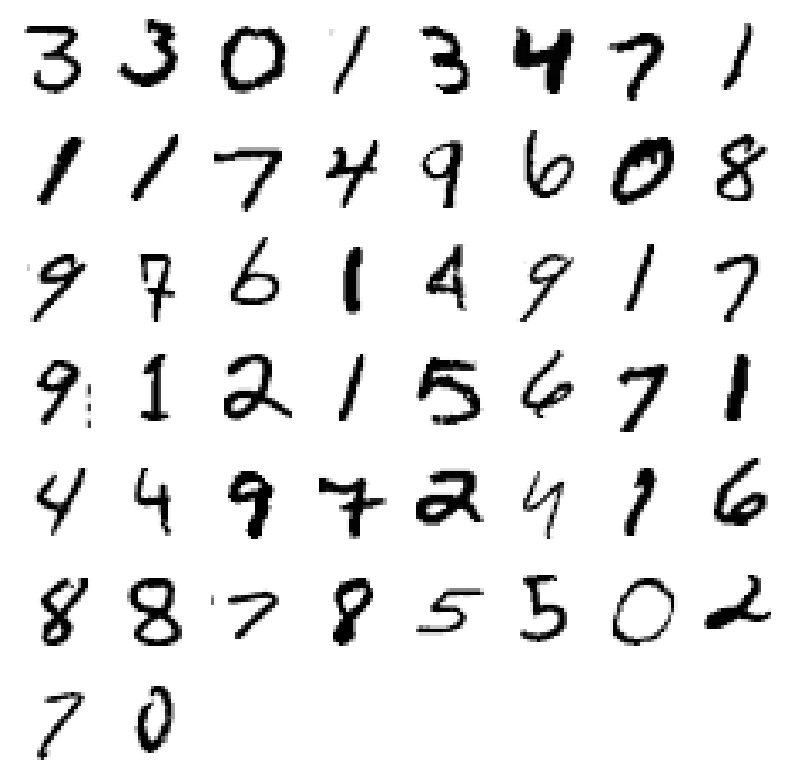

In [ ]:
# Seleccionar datos aleatoriamente
XSint_sample, ySint_sample = select_random_data(X, y, m_test)

# Graficar resultados
plot_results(XSint_sample, ySint_sample, all_theta)

# GRAFICAS - PASO 8
Se debe visualizar de manera obligatorio graficas que muestren el costo y la precisión en relación a los epochs de entrenamiento.

In [ ]:
"""from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)"""

In [ ]:
# Definir el número de etiquetas (0 al 9)
#num_labels = 10
print(num_labels)

10


In [ ]:
# Entrenar el modelo por primera vez
all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

Theta para la clase 0: [-4.81332648e+00  1.55104016e-01  4.30428098e+00  3.10217087e+00
  1.95585122e-01 -9.80435059e+00 -1.01518343e+00  5.35621747e+00
  5.37895340e-02  6.66293682e+00 -4.37546685e-02  5.80578123e+00
 -9.23111628e+00 -3.29895296e+00 -2.41223566e+00  8.02346173e+00
  2.03468246e+00 -5.55534399e+00 -9.30892284e+00 -4.16907298e+00
 -5.54156716e-02 -4.47857545e-01 -4.64140986e+00 -2.30932754e-01
  3.90767305e+00 -1.92412892e+00  1.04166931e+01  6.50143158e+00
 -7.05972745e-01  3.06369401e+00  1.96774146e+00 -1.07216024e+01
  4.84573336e+00  3.41966921e+00  1.05436940e-01  9.93973894e+00
  1.15457540e+00 -4.36186060e+00 -1.89838067e+00  6.31477432e-01
 -7.44803512e+00  2.15549797e+00  3.48488218e+00 -1.08098159e+00
 -4.38824765e+00 -2.43259264e+00 -8.21705196e+00 -2.56584994e+00
  2.27381850e+00 -8.93991512e-01 -1.54581935e+00  2.63881271e+00
  2.65673017e+00  4.56297339e+00 -3.80706346e+00  8.52488784e+00
  3.37818839e+00  6.53312976e+00 -3.73198366e+00 -9.97437417e-01
  

In [ ]:
# Entrenar el modelo por segunda vez (puedes cambiar parámetros si lo necesitas)
all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

In [ ]:
# Entrenar el modelo por tercera vez (puedes cambiar parámetros si lo necesitas)
all_theta_3, cost_histories_3 = oneVsAll(X_train, y_train, num_labels, lambda_)

### Función personalizada para calcular la precisión

`accuracy = accuracy_score_manual(y_true_class, y_pred_class) * 100` se realiza para convertir la precisión de un valor decimal (entre 0 y 1) a un porcentaje (entre 0% y 100%).

Esto se hace para que la precisión sea más fácil de interpretar y comprender. En lugar de mostrar un valor como 0.85, se muestra como 85%, lo que indica que el modelo tiene una precisión del 85% para esa clase.




Tamaño del conjunto de entrenamiento: (32000, 784)
Tamaño del conjunto de prueba: (8000, 784)
Primera precisión global en el conjunto de entrenamiento: 71.28%
Primera precisión global en el conjunto de prueba: 37.41%

Precisión por clase en el conjunto de entrenamiento:
Precisión para la clase 0: 96.25%
Precisión para la clase 1: 94.09%
Precisión para la clase 2: 94.20%
Precisión para la clase 3: 93.18%
Precisión para la clase 4: 94.14%
Precisión para la clase 5: 93.64%
Precisión para la clase 6: 95.13%
Precisión para la clase 7: 94.37%
Precisión para la clase 8: 94.13%
Precisión para la clase 9: 93.41%

Precisión por clase en el conjunto de prueba:
Precisión para la clase 0: 89.25%
Precisión para la clase 1: 87.25%
Precisión para la clase 2: 87.29%
Precisión para la clase 3: 87.33%
Precisión para la clase 4: 86.61%
Precisión para la clase 5: 88.30%
Precisión para la clase 6: 87.79%
Precisión para la clase 7: 87.00%
Precisión para la clase 8: 87.30%
Precisión para la clase 9: 86.71%


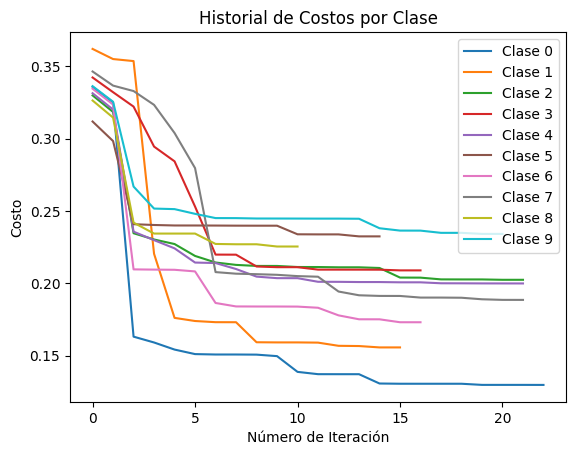


Realizando un segundo entrenamiento con nuevos datos...
Segunda precisión global en el conjunto de entrenamiento: 71.28%
Segunda precisión global en el conjunto de prueba: 37.41%

Precisión por clase en el conjunto de entrenamiento (segunda iteración):
Precisión para la clase 0: 96.25%
Precisión para la clase 1: 94.09%
Precisión para la clase 2: 94.20%
Precisión para la clase 3: 93.18%
Precisión para la clase 4: 94.14%
Precisión para la clase 5: 93.64%
Precisión para la clase 6: 95.13%
Precisión para la clase 7: 94.37%
Precisión para la clase 8: 94.13%
Precisión para la clase 9: 93.41%

Precisión por clase en el conjunto de prueba (segunda iteración):
Precisión para la clase 0: 89.25%
Precisión para la clase 1: 87.25%
Precisión para la clase 2: 87.29%
Precisión para la clase 3: 87.33%
Precisión para la clase 4: 86.61%
Precisión para la clase 5: 88.30%
Precisión para la clase 6: 87.79%
Precisión para la clase 7: 87.00%
Precisión para la clase 8: 87.30%
Precisión para la clase 9: 86.71%

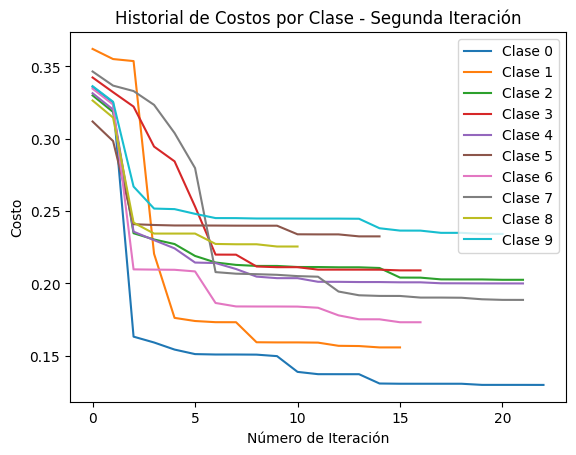


Realizando un tecer entrenamiento con nuevos datos...
Tercera precisión global en el conjunto de entrenamiento: 71.28%
Tercera precisión global en el conjunto de prueba: 37.41%

Precisión por clase en el conjunto de entrenamiento (tercera iteración):
Precisión para la clase 0: 96.25%
Precisión para la clase 1: 94.09%
Precisión para la clase 2: 94.20%
Precisión para la clase 3: 93.18%
Precisión para la clase 4: 94.14%
Precisión para la clase 5: 93.64%
Precisión para la clase 6: 95.13%
Precisión para la clase 7: 94.37%
Precisión para la clase 8: 94.13%
Precisión para la clase 9: 93.41%

Precisión por clase en el conjunto de prueba (tercera iteración):
Precisión para la clase 0: 89.25%
Precisión para la clase 1: 87.25%
Precisión para la clase 2: 87.29%
Precisión para la clase 3: 87.33%
Precisión para la clase 4: 86.61%
Precisión para la clase 5: 88.30%
Precisión para la clase 6: 87.79%
Precisión para la clase 7: 87.00%
Precisión para la clase 8: 87.30%
Precisión para la clase 9: 86.71%


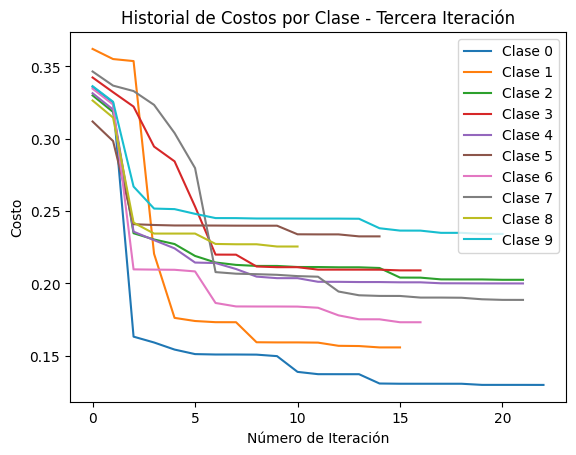

In [ ]:
# Función personalizada para calcular la precisión
def accuracy_score_manual(y_true, y_pred):
    correct = sum(y_true == y_pred) #Sum del número total de predicciones correctas.
    total = len(y_true)
    return correct / total

# Función para calcular la precisión para cada clase
def accuracy_per_class(y_true, y_pred, num_labels):

    #Se crea una lista vacía para almacenar las precisiones de cada clase.
    accuracies = []

    for label in range(num_labels):
        # Filtrar solo las instancias de la clase actual
        y_true_class = (y_true == label)
        y_pred_class = (y_pred == label)
        # Calcular precisión para la clase actual
        accuracy = accuracy_score_manual(y_true_class, y_pred_class) * 100
        accuracies.append(accuracy)
        print(f'Precisión para la clase {label}: {accuracy:.2f}%')
    return accuracies

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

# Entrenar el modelo por primera vez para 10 etiquetas
#all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el conjunto de entrenamiento y prueba
y_pred_train_1 = predictOneVsAll(all_theta_1, X_train)
y_pred_test_1 = predictOneVsAll(all_theta_1, X_test)

# Calcular la precisión GLOBAL en ambos conjuntos usando la función manual
accuracy_train_1 = accuracy_score_manual(y_train, y_pred_train_1) * 100
accuracy_test_1 = accuracy_score_manual(y_test, y_pred_test_1) * 100

print(f'Primera precisión global en el conjunto de entrenamiento: {accuracy_train_1:.2f}%')
print(f'Primera precisión global en el conjunto de prueba: {accuracy_test_1:.2f}%')

# Calcular la precisión por CLASE en el conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento:")
accuracy_per_class(y_train, y_pred_train_1, num_labels)

print("\nPrecisión por clase en el conjunto de prueba:")
accuracy_per_class(y_test, y_pred_test_1, num_labels)

# Graficar el historial de costos para la primera iteración (para las 10 clases)
for i in range(num_labels):  # Aquí i va de 0 a 9
    plt.plot(cost_histories_1[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase')
plt.legend()
plt.show()

# Hacer un segundo entrenamiento
print("\nRealizando un segundo entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (para 10 etiquetas)
#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_2 = predictOneVsAll(all_theta_2, X_train)
y_pred_test_2 = predictOneVsAll(all_theta_2, X_test)

# Calcular la precisión GLOBAL en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_2 = accuracy_score_manual(y_train, y_pred_train_2) * 100
accuracy_test_2 = accuracy_score_manual(y_test, y_pred_test_2) * 100

print(f'Segunda precisión global en el conjunto de entrenamiento: {accuracy_train_2:.2f}%')
print(f'Segunda precisión global en el conjunto de prueba: {accuracy_test_2:.2f}%')

# Calcular la precisión por clase en el segundo conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento (segunda iteración):")
accuracy_per_class(y_train, y_pred_train_2, num_labels)

print("\nPrecisión por clase en el conjunto de prueba (segunda iteración):")
accuracy_per_class(y_test, y_pred_test_2, num_labels)

# Graficar el historial de costos para la segunda iteración (para las 10 clases)
for i in range(num_labels):  # Nuevamente, i va de 0 a 9
    plt.plot(cost_histories_2[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Segunda Iteración')
plt.legend()
plt.show()



# Hacer un TERCER entrenamiento
print("\nRealizando un tecer entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (para 10 etiquetas)
#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_3 = predictOneVsAll(all_theta_3, X_train)
y_pred_test_3 = predictOneVsAll(all_theta_3, X_test)

# Calcular la precisión global en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_3 = accuracy_score_manual(y_train, y_pred_train_3) * 100
accuracy_test_3 = accuracy_score_manual(y_test, y_pred_test_3) * 100

print(f'Tercera precisión global en el conjunto de entrenamiento: {accuracy_train_3:.2f}%')
print(f'Tercera precisión global en el conjunto de prueba: {accuracy_test_3:.2f}%')

# Calcular la precisión por clase en el segundo conjunto de entrenamiento y prueba
print("\nPrecisión por clase en el conjunto de entrenamiento (tercera iteración):")
accuracy_per_class(y_train, y_pred_train_3, num_labels)

print("\nPrecisión por clase en el conjunto de prueba (tercera iteración):")
accuracy_per_class(y_test, y_pred_test_3, num_labels)

# Graficar el historial de costos para la segunda iteración (para las 10 clases)
for i in range(num_labels):  # Nuevamente, i va de 0 a 9
    plt.plot(cost_histories_3[i], label=f'Clase {i}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Tercera Iteración')
plt.legend()
plt.show()

Tamaño del conjunto de entrenamiento: (32000, 784)
Tamaño del conjunto de prueba: (8000, 784)
Primera precisión en el conjunto de entrenamiento: 71.28%
Primera precisión en el conjunto de prueba: 37.41%


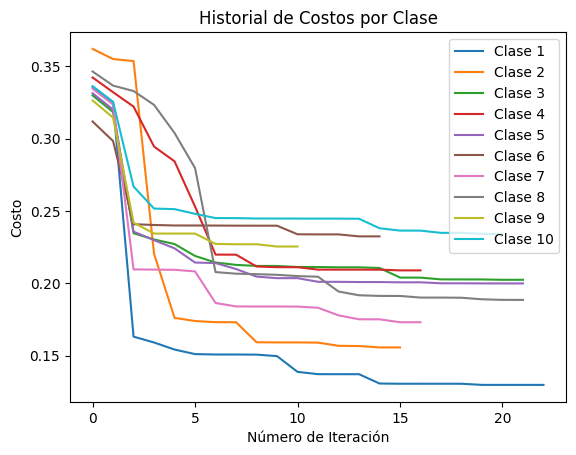

Realizando un segundo entrenamiento con nuevos datos...
Segunda precisión en el conjunto de entrenamiento: 71.28%
Segunda precisión en el conjunto de prueba: 37.41%


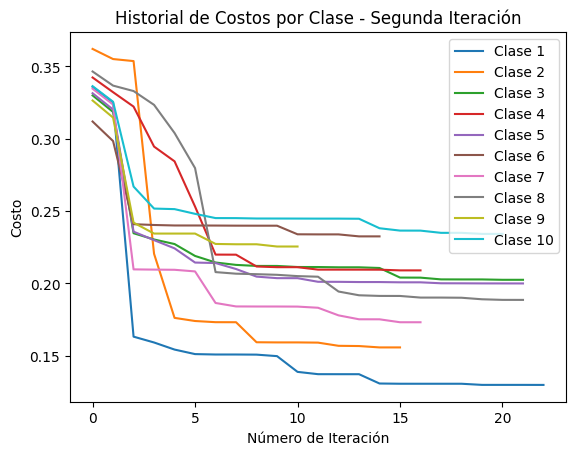

In [ ]:
# Mostrar porcentaje generales--- Función personalizada para calcular la precisión
def accuracy_score_manual(y_true, y_pred):
    correct = sum(y_true == y_pred)
    total = len(y_true)
    return correct / total

print(f'Tamaño del conjunto de entrenamiento: {X_train.shape}')
print(f'Tamaño del conjunto de prueba: {X_test.shape}')

# Entrenar el modelo por primera vez
#all_theta_1, cost_histories_1 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el conjunto de entrenamiento y prueba
y_pred_train_1 = predictOneVsAll(all_theta_1, X_train)
y_pred_test_1 = predictOneVsAll(all_theta_1, X_test)

# Calcular la precisión en ambos conjuntos usando la función manual
accuracy_train_1 = accuracy_score_manual(y_train, y_pred_train_1) * 100
accuracy_test_1 = accuracy_score_manual(y_test, y_pred_test_1) * 100

print(f'Primera precisión en el conjunto de entrenamiento: {accuracy_train_1:.2f}%')
print(f'Primera precisión en el conjunto de prueba: {accuracy_test_1:.2f}%')

# Graficar el historial de costos para la primera iteración
for i in range(num_labels):
    plt.plot(cost_histories_1[i], label=f'Clase {i+1}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase')
plt.legend()
plt.show()

# Hacer un segundo entrenamiento
print("Realizando un segundo entrenamiento con nuevos datos...")

# Entrenar el modelo por segunda vez (puedes cambiar parámetros si lo necesitas)
#all_theta_2, cost_histories_2 = oneVsAll(X_train, y_train, num_labels, lambda_)

# Predecir etiquetas para el segundo conjunto de entrenamiento y prueba
y_pred_train_2 = predictOneVsAll(all_theta_2, X_train)
y_pred_test_2 = predictOneVsAll(all_theta_2, X_test)

# Calcular la precisión en ambos conjuntos para el segundo entrenamiento usando la función manual
accuracy_train_2 = accuracy_score_manual(y_train, y_pred_train_2) * 100
accuracy_test_2 = accuracy_score_manual(y_test, y_pred_test_2) * 100

print(f'Segunda precisión en el conjunto de entrenamiento: {accuracy_train_2:.2f}%')
print(f'Segunda precisión en el conjunto de prueba: {accuracy_test_2:.2f}%')

# Graficar el historial de costos para la segunda iteración
for i in range(num_labels):
    plt.plot(cost_histories_2[i], label=f'Clase {i+1}')
plt.xlabel('Número de Iteración')
plt.ylabel('Costo')
plt.title('Historial de Costos por Clase - Segunda Iteración')
plt.legend()
plt.show()
